In [1]:
from rdflib import Graph

# Load the RDF data
g = Graph()
g.parse("isc2006.ttl", format="turtle")  # Replace with actual file path

print(f"Loaded {len(g)} triples.")


Loaded 10839 triples.


In [7]:
for s, p, o in list(g)[:10]:  # Print only the first 10 triples
    print(f"Subject: {s}\nPredicate: {p}\nObject: {o}\n")


Subject: http://resource.geosciml.org/classifier/ics/ischart/MiddleJurassic
Predicate: http://www.w3.org/2004/02/skos/core#prefLabel
Object: 中侏罗世

Subject: http://resource.geosciml.org/classifier/ics/ischart/BaseKungurianPosition
Predicate: http://resource.geosciml.org/ontology/timescale/thors#positionalUncertainty
Object: http://resource.geosciml.org/classifier/ics/ischart/BaseKungurianUncertainty

Subject: http://resource.geosciml.org/classifier/ics/ischart/BaseRhaetian
Predicate: http://www.w3.org/2004/02/skos/core#prefLabel
Object: Base of Rhaetian

Subject: http://resource.geosciml.org/classifier/ics/ischart/Bartonian
Predicate: http://www.w3.org/2004/02/skos/core#broaderTransitive
Object: http://resource.geosciml.org/classifier/ics/ischart/Phanerozoic

Subject: http://resource.geosciml.org/classifier/ics/ischart/Aptian
Predicate: http://www.w3.org/2004/02/skos/core#broaderTransitive
Object: http://resource.geosciml.org/classifier/ics/ischart/LowerCretaceous

Subject: http://resou

Loaded 10839 triples.

--- Extracted Geologic Periods ---

                       Period   Start        End
84                     Karnis  4600.0    48.6000
91                     hetanž  4000.0   506.5000
51                    Капитан  3600.0   155.6000
66             Neoproterozoic  3200.0  1000.0000
67                     Шейнуд  2500.0   443.7000
40               Changxingium  2050.0     0.0117
105                 Orosirien  1600.0   503.0000
92                Campaniense  1400.0   299.0000
56                   pridolij  1200.0   534.6000
87                    Induano  1000.0   284.4000
88                      贝利亚斯期  1000.0   228.7000
45                  Oxfordium   542.0   303.4000
85          Base of Thanetian   542.0     5.3320
57               fanerozoikum   542.0   245.9000
63                       温洛克世   542.0   359.2000
50         Dévonien inférieur   534.6   443.7000
23          Tortoniën - Linne   521.0  1800.0000
65                   fammenij   517.0   311.7000
81        

C:\Users\Admin\anaconda3\envs\Tim_scale\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36125 (\N{CJK UNIFIED IDEOGRAPH-8D1D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\envs\Tim_scale\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\envs\Tim_scale\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20122 (\N{CJK UNIFIED IDEOGRAPH-4E9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\envs\Tim_scale\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\envs\Tim_scale\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: G

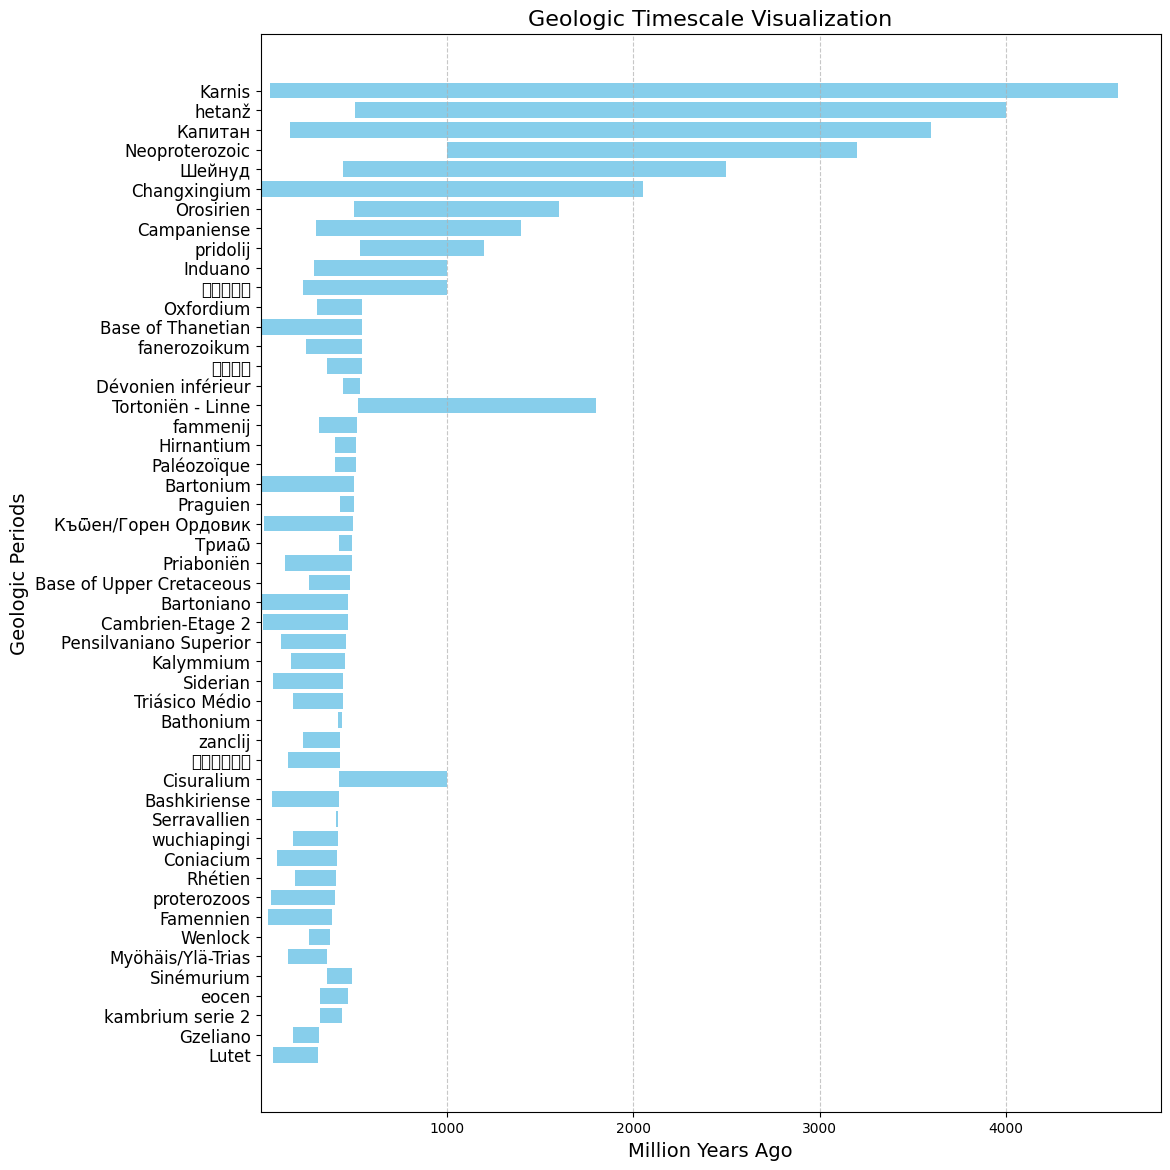

In [17]:
from rdflib import Graph
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the RDF file
file_path = "isc2006.ttl"
g = Graph()
g.parse(file_path, format="turtle")

print(f"Loaded {len(g)} triples.")

# Step 1: Extract geologic periods with start and end times
data = []

# Iterate through triples to extract period names and times
for s, p, o in g:
    subject = str(s)
    predicate = str(p)
    obj = str(o)

    # Extract period name
    if predicate == "http://www.w3.org/2004/02/skos/core#prefLabel":
        period_name = obj

    # Extract start and end times from rdfs#comment
    if predicate == "http://www.w3.org/2000/01/rdf-schema#comment":
        match_start = re.search(r'older bound-([\d.]+)', obj)  # Extract start time
        match_end = re.search(r'younger bound-([\d.]+)', obj)  # Extract end time

        if match_start:
            start_time = float(match_start.group(1))
        if match_end:
            end_time = float(match_end.group(1))

        # Store extracted values if valid
        if 'period_name' in locals() and 'start_time' in locals() and 'end_time' in locals():
            data.append([period_name, start_time, end_time])
            del period_name, start_time, end_time  # Reset variables

# Step 2: Convert to DataFrame
df = pd.DataFrame(data, columns=["Period", "Start", "End"])

# Remove duplicate period names
df = df.drop_duplicates(subset=["Period"])

# Sort by Start time (most recent first)
df = df.sort_values(by="Start", ascending=False)

# Limit to top 50 oldest periods for better readability
df_limited = df.head(50)

# Print extracted geologic periods
print("\n--- Extracted Geologic Periods ---\n")
print(df_limited)

# Step 3: Visualize the Geologic Timescale (if valid data exists)
if df_limited["Start"].notna().sum() > 0:
    plt.figure(figsize=(18, 14))  # Increased figure size for better readability

    # Plot horizontal bars for geologic periods
    plt.barh(df_limited["Period"], df_limited["Start"] - df_limited["End"], left=df_limited["End"], color="skyblue")

    # Improve axis labels and title
    plt.xlabel("Million Years Ago", fontsize=14)
    plt.ylabel("Geologic Periods", fontsize=14)
    plt.title("Geologic Timescale Visualization", fontsize=16)

    # Adjust y-axis labels for better readability
    plt.yticks(fontsize=12)

    # Invert y-axis to show time progressing from top to bottom
    plt.gca().invert_yaxis()

    # Add grid for better reference
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Adjust layout to avoid text overlap
    plt.subplots_adjust(left=0.4)  # Increase left margin for better spacing

    # Show the improved plot
    plt.show()
else:
    print("\nNo valid numeric Start/End values found. Check RDF structure.")
